In [1]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt
import numpy as np
import json

root = "/scistor/ivm/project/NSO/timeseries_50_baseline"
big_tiles_folder = root + "/big_tiles"
small_tiles_folder = root + "/small_tiles"
annotation_path = root + "/annotations_shp/fixed_substations_NL_annotations.shp"
json_folder = root + "/geojsons"

In [2]:
#Modfified from https://medium.com/the-downlinq/getting-started-with-spacenet-data-827fd2ec9f53
#Need to ajust it if there are several annotations in the same tiles

def plot_truth_coords(input_image, pixel_coords,   
                  figsize=(8,8), plot_name='',
                  add_title=False, poly_face_color='orange', 
                  poly_edge_color='red', poly_nofill_color='blue', cmap='bwr'):
    '''Plot ground truth coordinaates, pixel_coords should be a numpy array'''
    
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(2*figsize[0], figsize[1]))
    
    if add_title:
        suptitle = fig.suptitle(plot_name.split('/')[-1], fontsize='large')
    
    # create patches
    patches = []
    patches_nofill = []
    if len(pixel_coords) > 0:
        # get patches    

        patches_nofill.append(Polygon(pixel_coords, facecolor=poly_nofill_color, 
                                      edgecolor=poly_edge_color, lw=3))
        patches.append(Polygon(pixel_coords, edgecolor=poly_edge_color, fill=True, 
                               facecolor=poly_face_color))
        p0 = PatchCollection(patches, alpha=0.25, match_original=True)
        #p1 = PatchCollection(patches, alpha=0.75, match_original=True)
        p2 = PatchCollection(patches_nofill, alpha=0.75, match_original=True)
                   
    # ax0: raw image
    ax0.imshow(input_image)
    if len(patches) > 0:
        ax0.add_collection(p0)
    ax0.set_title('Input Image + Ground Truth Asset') 
    
    # truth polygons
    zero_arr = np.zeros(input_image.shape[:2])
    # set background to white?
    #zero_arr[zero_arr == 0.0] = np.nan
    ax1.imshow(zero_arr, cmap=cmap)
    if len(patches) > 0:
        ax1.add_collection(p2)
    ax1.set_title('Ground Truth Asset Polygons')
        
    #plt.axis('off')
    plt.tight_layout()
    if add_title:
        suptitle.set_y(0.95)
        fig.subplots_adjust(top=0.96)
    #plt.show()
 
    if len(plot_name) > 0:
        plt.savefig(plot_name)
    
    return patches, patches_nofill

([<matplotlib.patches.Polygon at 0x15551bd062b0>],
 [<matplotlib.patches.Polygon at 0x15551c592400>])

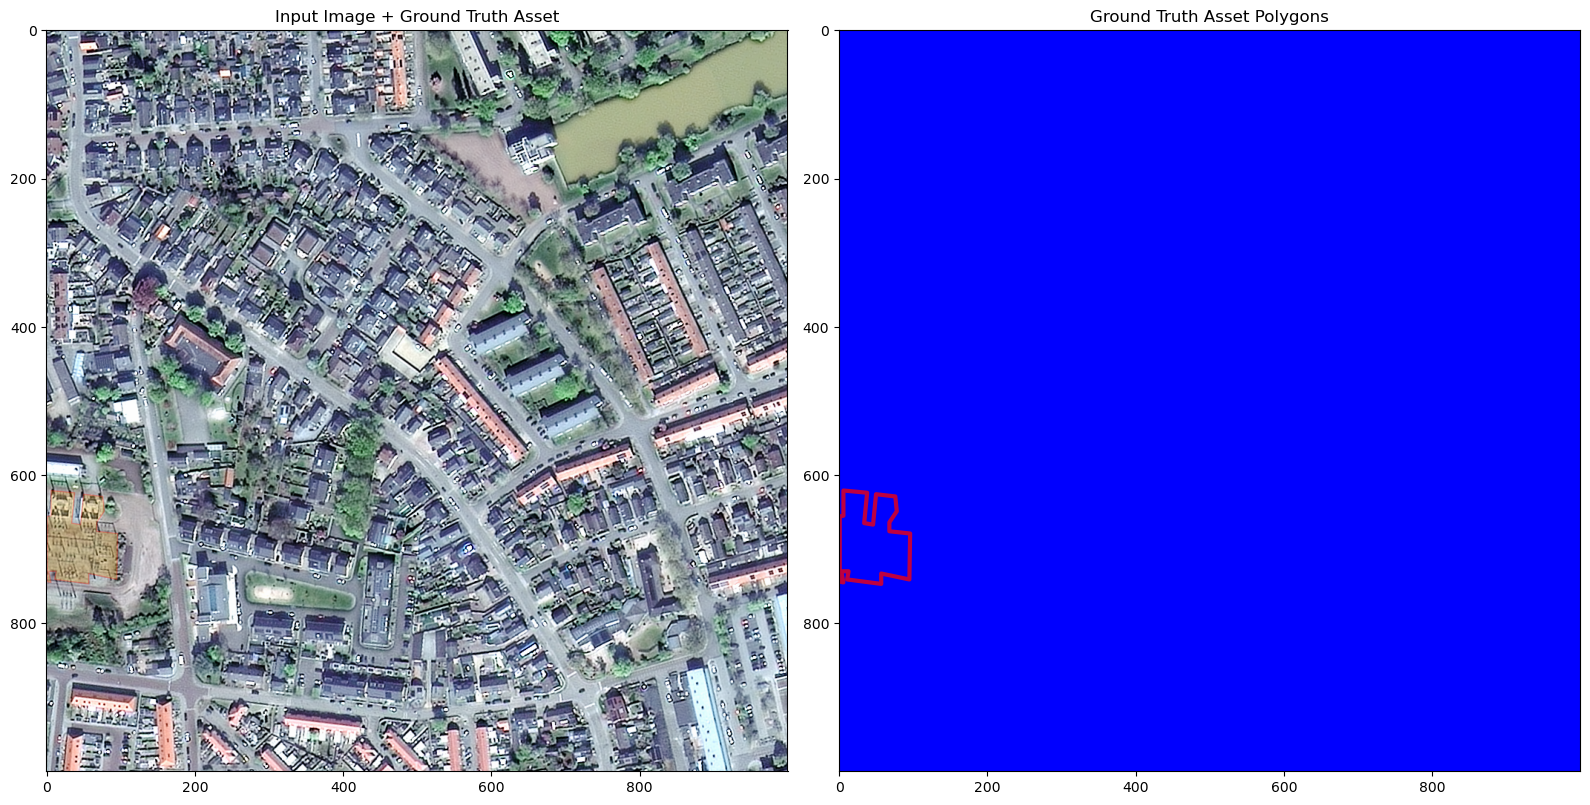

In [8]:
json_file = root + "/jsons/via_region_train.json"

with open (json_file, 'r') as f:
    js = json.load(f)

test_images = list(js.keys())
image = test_images[10]
x = js[image]['regions']['0']['shape_attributes']['all_points_x']
y = js[image]['regions']['0']['shape_attributes']['all_points_y']

list_coords = []
for i, j in zip (x,y):
    tuple_coord = (i,j)
    coord = np.array(tuple_coord)
    list_coords.append(coord)

img = plt.imread(root + '/small_tiles_png/' + image)
plot_truth_coords(img, list_coords)